## Résolution de Mean Fields games avec effets de congestion

In [1]:
import sys
import os
# Ajoute le chemin absolu vers le dossier 'src'
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)
    
# importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from mean_field_game import *

Ce projet vise à simuler numériquement l'évolution d'une population d'agents rationnels confrontés à des effets de **congestion**. Nous comparons deux modèles :
1. **MFG (Nash Equilibrium)** : Chaque agent minimise son propre coût.
2. **MFC (Optimum Social)** : Un planificateur central minimise le coût total.

On peut se référer au document du projet pour les éléments de contexte et les résultats théoriques. Le système à résoudre est composé de l'équation de Hamilton-Jacobi-Bellman (HJB) et de l'équation de Kolmogorov Fokker-Planck (KFP) :

$$
\begin{cases}
-\partial_t u - \nu \Delta u + H(x, m, \nabla u) = f(x, m) & \text{(HJB)} \\
\partial_t m - \nu \Delta m - \text{div}(m \frac{\partial H}{\partial p}(x, m, \nabla u)) = 0 & \text{(KFP)} \\
u(T, x) = \phi(x, m(T,x)), \quad m(0, x) = m_0(x)
\end{cases}
$$

Où le Hamiltonien avec effet de congestion est défini par :
$$H(x, m, p) = \frac{1}{\beta (c_0 + c_1 m)^\alpha} |p|^\beta$$

On résoud ce jeu à champ moyen pour les différents set de paramètres ci-après :

In [ ]:
# Grille spatio-temporelle
Nh, NT = 201, 100
h, T = 1/(Nh-1), 1.0
dt = T/NT

# Liste des paramètres (Sets 1 à 5)
params_list = [
    {'c0': 0.1,  'c1': 1.0, 'alpha': 0.5, 'sigma': 0.02, 'theta': 0.01},
    {'c0': 0.1,  'c1': 5.0, 'alpha': 1.0, 'sigma': 0.02, 'theta': 0.01},
    {'c0': 0.01, 'c1': 2.0, 'alpha': 1.2, 'sigma': 0.1,  'theta': 0.2},
    {'c0': 0.01, 'c1': 2.0, 'alpha': 1.5, 'sigma': 0.2,  'theta': 0.2},
    {'c0': 1.0,  'c1': 3.0, 'alpha': 2.0, 'sigma': 0.002, 'theta': 0.001}
]

=== PARTIE 1 : ÉTUDE DE SENSIBILITÉ (MODÈLE MFG) ===
Simulation MFG Exp 1 en cours...


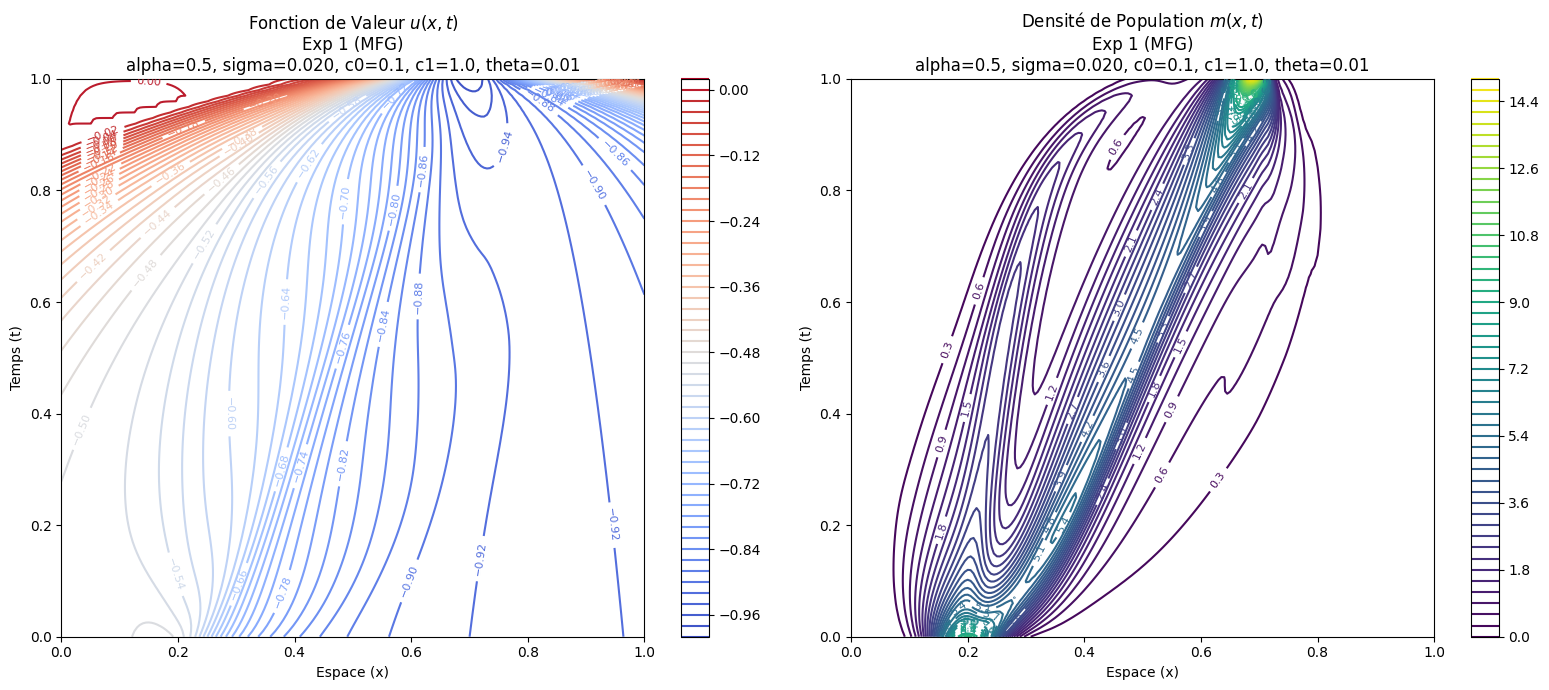

Simulation MFG Exp 2 en cours...


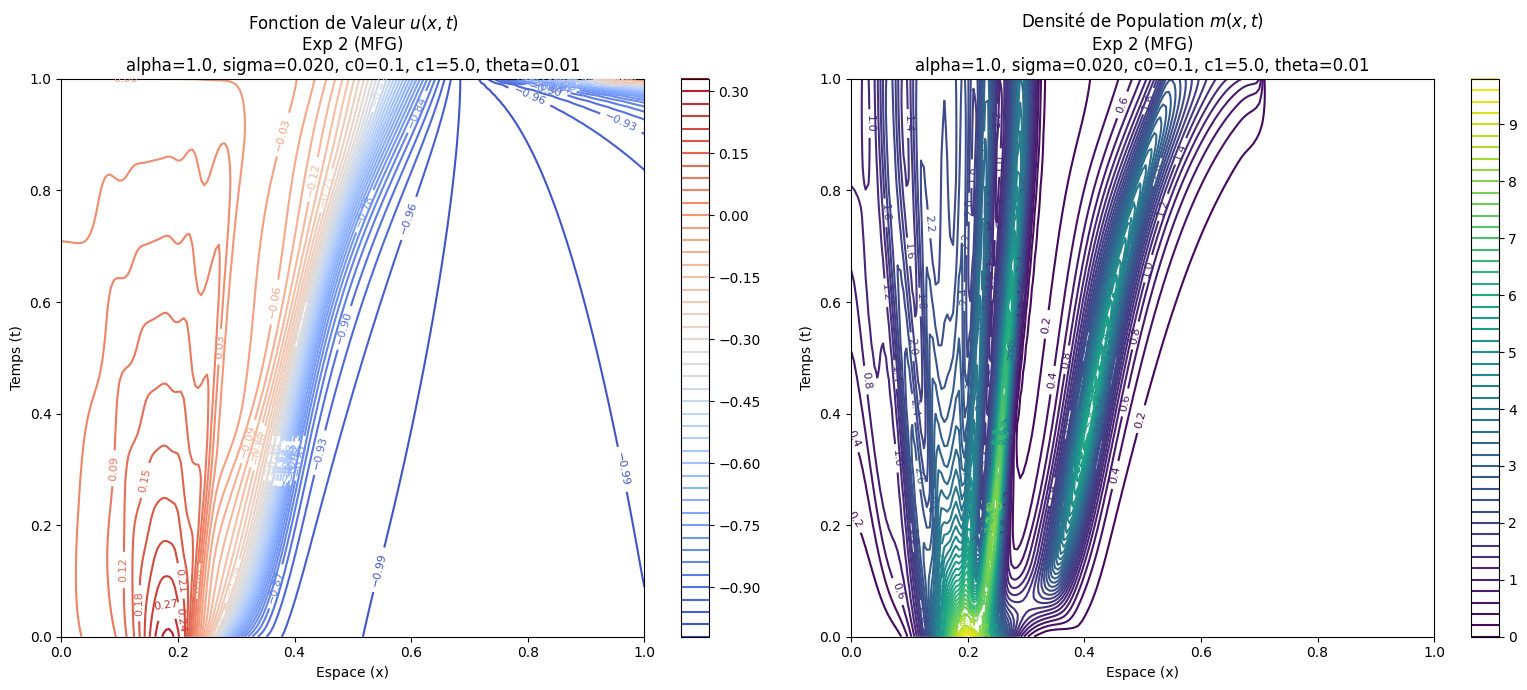

Simulation MFG Exp 3 en cours...


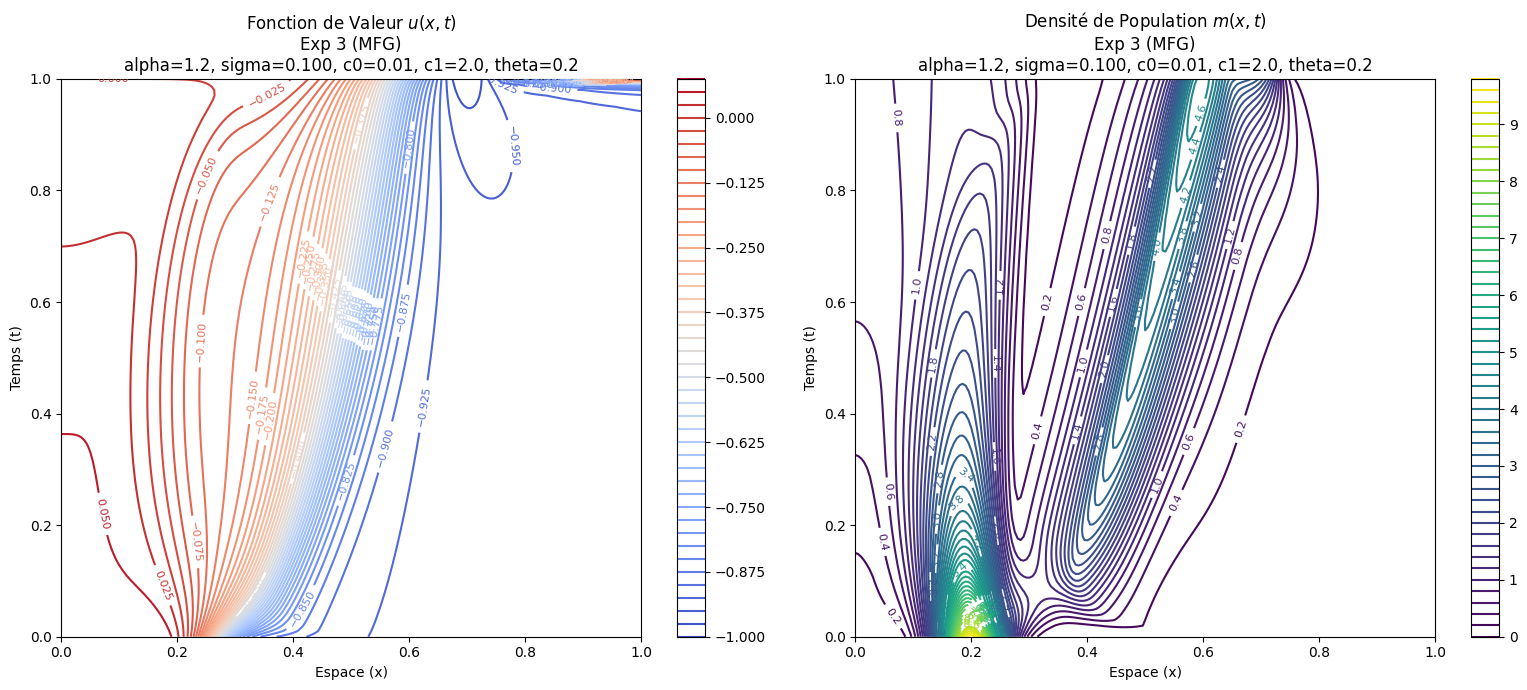

Simulation MFG Exp 4 en cours...
   -> [MFG] Convergé en 620 itérations (err=9.65e-07)


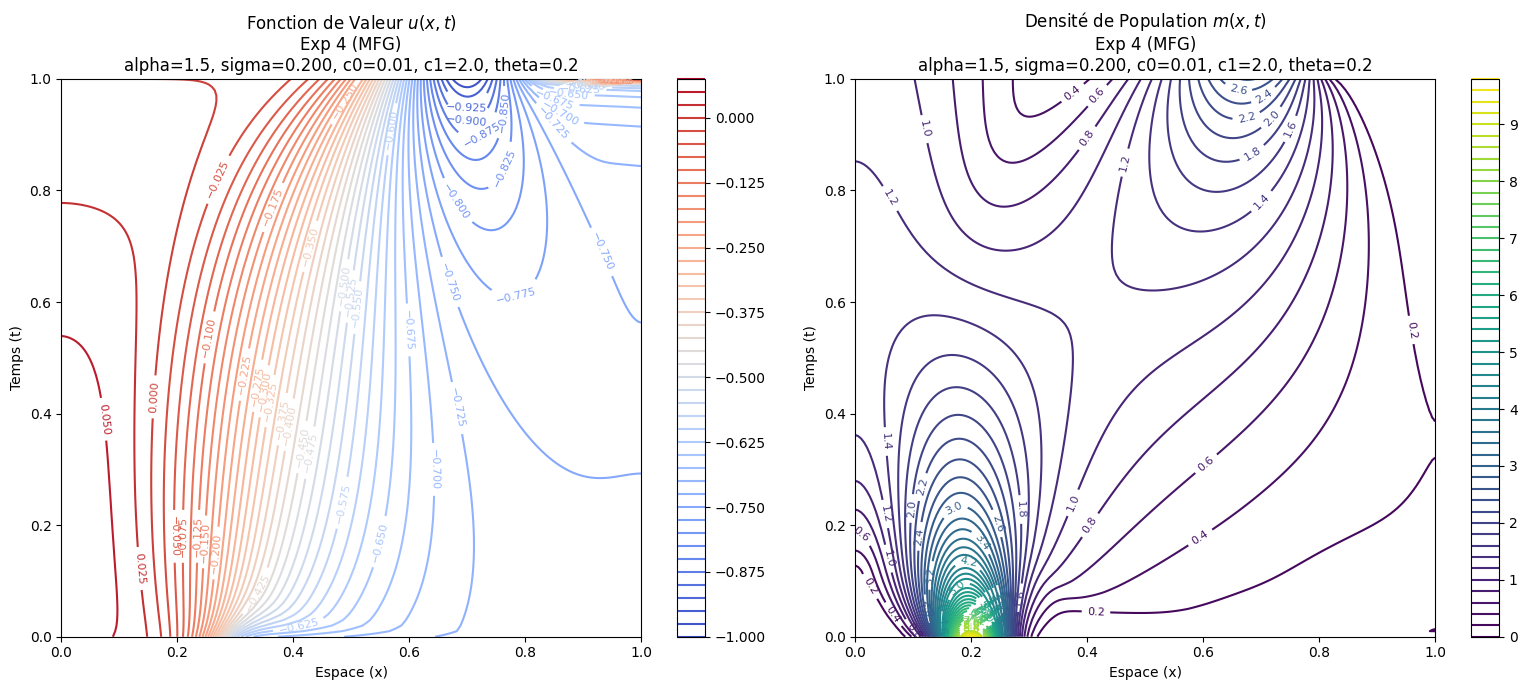

Simulation MFG Exp 5 en cours...


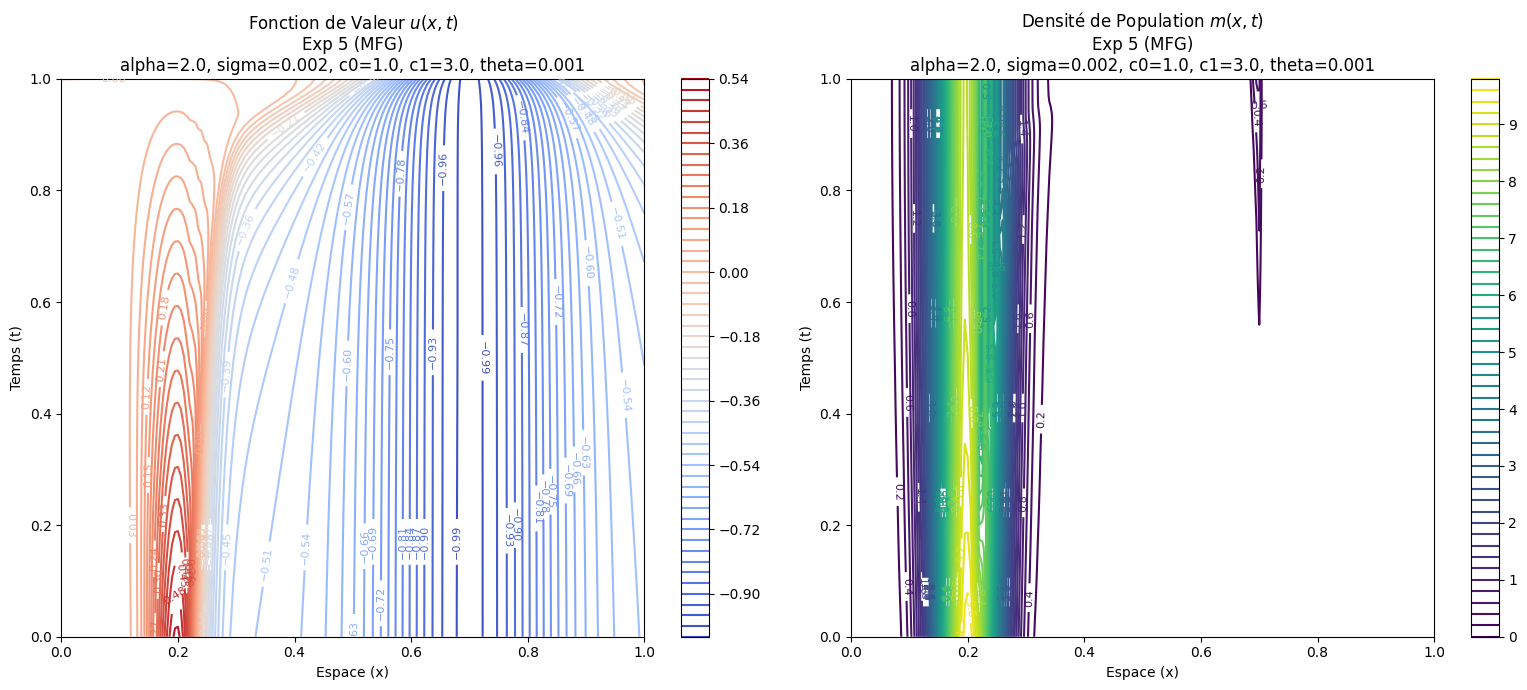

In [2]:
run_mfg_sensitivity()

## 📊 Synthèse des Résultats Numériques (Modèle MFG)

Cette section résume l'impact des paramètres physiques et économiques sur l'équilibre de Nash atteint par la population. L'analyse des cinq expériences permet d'illustrer la transition entre un mouvement fluide et un mouvement contraint par la congestion.

---

### 1. Dynamique de la Fonction de Valeur $u(x, t)$ (Stratégie)
La fonction de valeur représente l'effort optimal et le coût anticipé par les agents pour atteindre leur cible.
* **Croissance du coût :** Dans tous les cas, $u$ augmente au cours du temps. Cette croissance est d'autant plus rapide que la congestion est forte ($\alpha$ et $c_1$ élevés).
* **Effet de la congestion ($c_1, \alpha$) :** Dans les **Expériences 2, 3 et 5**, l'augmentation de ces paramètres force $u$ à atteindre des valeurs plus élevées, traduisant un effort de contrôle plus important pour naviguer dans une foule dense.
* **Rôle de l'inertie ($c_0$) :** L'**Expérience 5** montre qu'un $c_0$ élevé (1.0) agit comme un coût fixe de base, atténuant relativement l'impact immédiat des variations de densité sur le coût de mouvement.

---

### 2. Évolution de la Densité $m(x, t)$ (Dynamique de groupe)
La répartition de la population résulte de l'arbitrage entre la volonté d'atteindre la cible et l'évitement des zones encombrées.
* **Impact de la Diffusion ($\sigma$) :** * **Fort bruit (Exp. 3 et 4) :** Un $\sigma$ élevé (0.1 - 0.2) provoque une dispersion rapide de la masse. L'incertitude individuelle l'emporte sur la stratégie de groupe, lissant les pics de densité.
    * **Faible bruit (Exp. 5) :** Avec $\sigma = 0.002$, la diffusion est quasi nulle. La population se déplace comme un bloc cohérent, rendant les zones de haute concentration persistantes dans le temps et l'espace.
* **Effet "Bouchon" :** Lorsque la congestion est marquée (notamment dans l'**Expérience 2** avec $c_1=5.0$), la population s'étale davantage ou ralentit sa progression pour maintenir le coût de mouvement à un niveau acceptable.

---

### 3. Conclusion Technique
Les simulations confirment les attentes théoriques du jeu à champ moyen:
1. **La congestion** ($\alpha, c_1$) agit comme une force qui s'oppose à la diffusion de la population.
2. **La diffusion** ($\sigma$) agit comme un facteur de lissage qui régularise les solutions mais diminue la précision du contrôle.
3. **La stabilité numérique** est maintenue même dans les cas extrêmes (Exp. 5) grâce à l'ajustement du paramètre de relaxation $\theta$, permettant d'atteindre un équilibre de Nash cohérent entre le coût individuel et la dynamique globale.

### Le Système Mean Field Control (MFC)
Dans le cas du contrôle de champ moyen, le planificateur central minimise un coût global. Cela conduit à un Hamiltonien modifié dans l'équation HJB pour tenir compte de l'impact de la densité sur le coût futur :

$$\tilde{H}(m, p) = H(m, p) \times \left( 1 - \frac{c_1 \alpha m}{c_0 + c_1 m} \right)$$

L'équation de transport (KFP) reste identique car elle suit la vitesse optimale dérivée du Hamiltonien standard.

=== PARTIE 2 : COMPARAISON MFG VS MFC (SET 1) ===
Calcul du modèle MFG (Nash)...


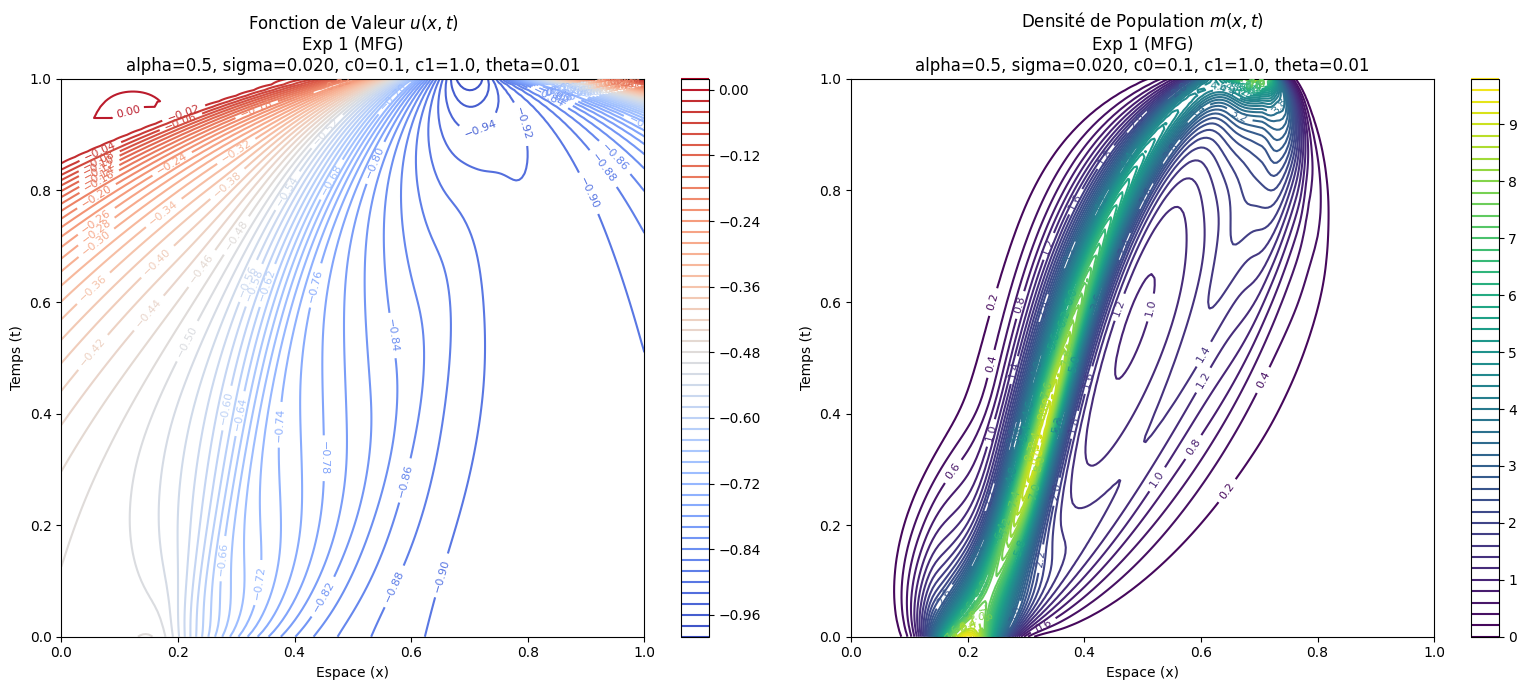

Calcul du modèle MFC (Social)...


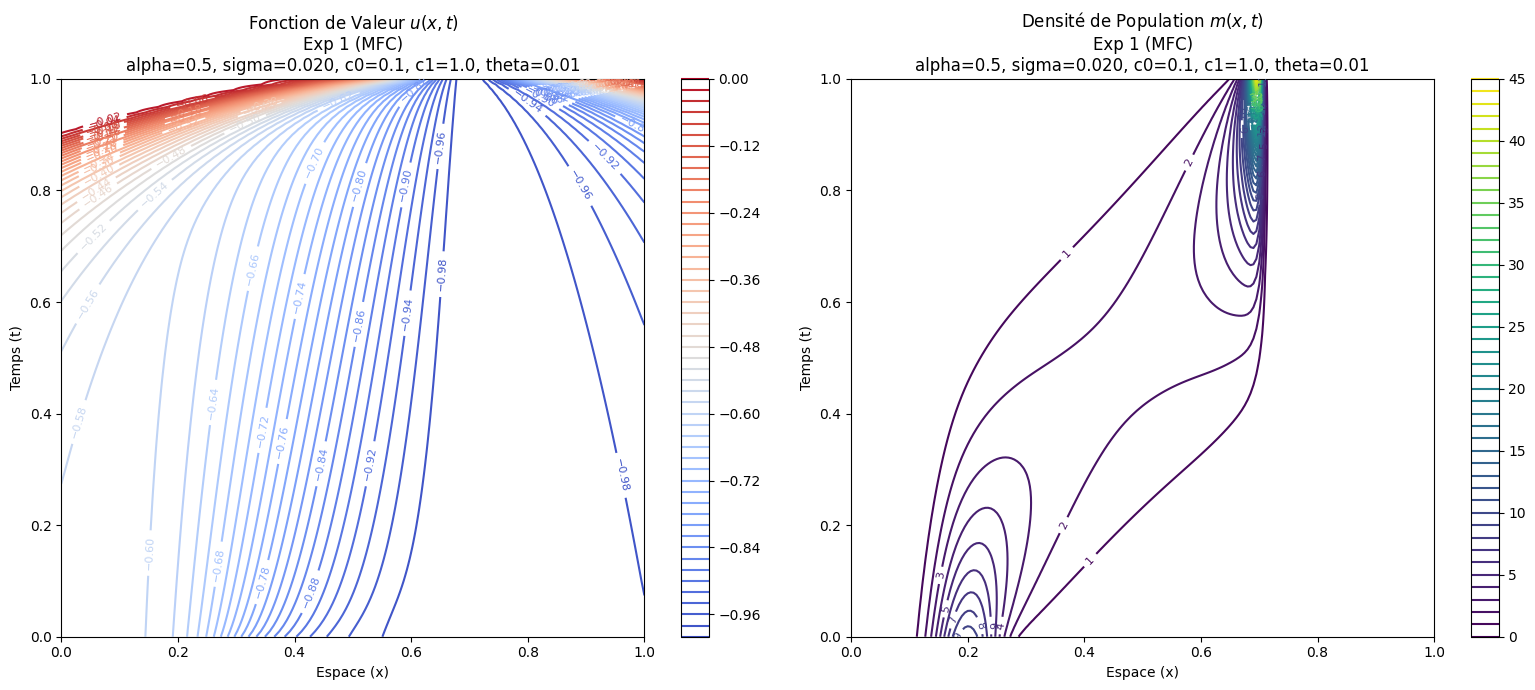

In [3]:
# 📌 Exécuter les simulations
run_comparison_set_1()

For this set of parameters, the social optimum (MFC) prioritizes a massive concentration on the target to optimize the global criterion. The Nash equilibrium (MFG) illustrates a lack of coordination where individual freedom of movement results in increased dispersion and a significantly lower peak density.